In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(n):
    x = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))
    return x,y


def analyse_dataset(n):
    x, y = load_dataset(n)

    means = x.mean(axis=0)
    std = x.mean(axis=0)

    mean0 = x[y==0].mean(axis=0)
    mean1 = x[y==1].mean(axis=0)
    diff = mean0 - mean1
    
    correlation_matrix = np.corrcoef(x, rowvar=False)

    mins = x.min(axis=0)
    maxs = x.max(axis=0)
    out = np.stack([mins,maxs], axis=0)
    
    return means,std, diff, correlation_matrix, out



In [14]:
means, std, diff, corr_m, out = analyse_dataset(10)

print(np.round(corr_m,3))


[[ 1.     0.004 -0.     0.005 -0.     0.006  0.004  0.005  0.003 -0.004]
 [ 0.004  1.    -0.001  0.004 -0.007 -0.01   0.006  0.006 -0.016  0.001]
 [-0.    -0.001  1.     0.011 -0.001  0.001  0.007 -0.002 -0.004  0.004]
 [ 0.005  0.004  0.011  1.     0.001 -0.016 -0.009  0.004  0.001 -0.002]
 [-0.    -0.007 -0.001  0.001  1.    -0.003  0.007 -0.    -0.006  0.004]
 [ 0.006 -0.01   0.001 -0.016 -0.003  1.    -0.001 -0.004  0.015  0.013]
 [ 0.004  0.006  0.007 -0.009  0.007 -0.001  1.    -0.003 -0.009  0.012]
 [ 0.005  0.006 -0.002  0.004 -0.    -0.004 -0.003  1.     0.001  0.007]
 [ 0.003 -0.016 -0.004  0.001 -0.006  0.015 -0.009  0.001  1.    -0.002]
 [-0.004  0.001  0.004 -0.002  0.004  0.013  0.012  0.007 -0.002  1.   ]]


In [15]:
print(np.round(diff,4))

[ 0.0213  0.0179  0.0094 -0.0011 -0.0039 -0.0157 -0.0015 -0.0002  0.0074
  0.0072]


Why the dataset is difficult to fit:
- diff: the class-conditional mean difference is consistently near zero. This indicates that the average feature values for samples labelled 0 and 1 are nearly identical
- the correlation matrices are all arounds 0 apart from the diagonal, suggesting no correlation between features

In [16]:
print(np.round(out,4))
# first array is the min for every feature, the second is the max

[[-0.3961 -0.3815 -0.3738 -0.379  -0.3899 -0.3866 -0.3648 -0.4359 -0.3566
  -0.3753]
 [ 1.3699  1.39    1.4005  1.4038  1.3638  1.3769  1.3908  1.4769  1.3698
   1.3559]]


In [17]:
def has_duplicates(n):
    x = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    unique = np.unique(x, axis=0)
    return len(unique) != len(x)

features = [10, 12, 14, 16, 18, 20]
duplicates = False
for n in features:
    if (has_duplicates(n)):
        duplicates = True

print(duplicates)

False


In [18]:
def shape(n):
    x,y = load_dataset(n)
    print(x.shape, y.shape)

shape(16)

(32000, 16) (32000,)


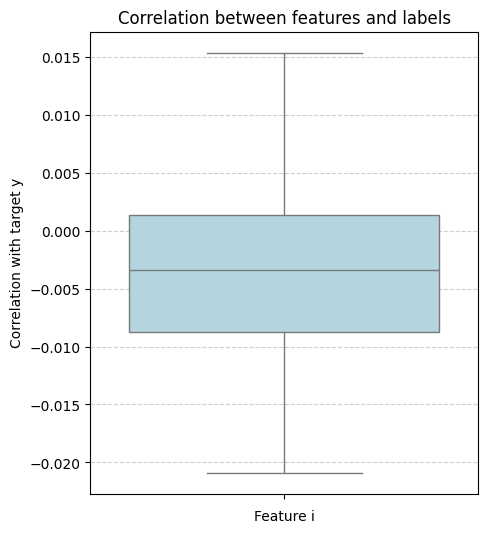

In [19]:
# correlation between features and the output
x,y = load_dataset(10)
corrs = np.array([np.corrcoef(x[:,j], y)[0,1] for j in range(x.shape[1])])

# create boxplot
plt.figure(figsize=(5,6))
sns.boxplot(y=corrs, color='lightblue')
plt.ylabel('Correlation with target y')
plt.xlabel('Feature i')
plt.title('Correlation between features and labels')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

